In [51]:
import pandas as pd
from collections import defaultdict

In [52]:
f_path = './data/EXTR_RPSale.csv'
sale_df = pd.read_csv(f_path, sep=',', header=0)
sale_df.head()

/Users/chelsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [53]:
sale_df.DocumentDate.str[3:].head()

0    21/2014
1    09/1991
2    11/2014
3    04/2013
4    20/1989
Name: DocumentDate, dtype: object

In [54]:
sale_df.shape

(1964146, 24)

In [55]:
graph_df = sale_df[['DocumentDate', 'Major', 'Minor', 'Volume']]

In [62]:
graph_df['DocumentYear'] = graph_df.DocumentDate.str[6:]
graph_df['DocumentMonth'] = graph_df.DocumentDate.str[:2]

/Users/chelsea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/chelsea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
graph_df.head()

,DocumentDate,Major,Minor,Volume,DocumentYear,DocumentMonth
0,08/21/2014,138860,110,,2014,08
1,07/09/1991,664885,40,071,1991,07
2,10/11/2014,423943,50,,2014,10
3,01/04/2013,403700,715,,2013,01
4,04/20/1989,951120,900,117,1989,04


In [80]:
df_2017 = graph_df[graph_df['DocumentYear'] == '1989']

In [81]:
df_2017.head()

,DocumentDate,Major,Minor,Volume,DocumentYear,DocumentMonth
4,04/20/1989,951120,900,117,1989,04
58,03/22/1989,162405,9259,000,1989,03
636,11/15/1989,177645,230,109,1989,11
832,05/17/1989,4100,290,012,1989,05
932,06/21/1989,72604,9178,000,1989,06


In [96]:
import numpy as np

df_2017 = df_2017[['DocumentMonth', 'Volume']]
df_2017.Volume = df_2017[['Volume']].convert_objects(convert_numeric=True).fillna(0)

pd.to_numeric(df_2017.Volume)

/Users/chelsea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


4          117.0
58           0.0
636        109.0
832         12.0
932          0.0
1007        39.0
1033       107.0
1110         0.0
1193        40.0
1240        22.0
1241        22.0
1313        89.0
1414       142.0
1548        15.0
1566        61.0
1821        49.0
1880        19.0
2009         0.0
2133        88.0
2256       121.0
2438         0.0
2463       127.0
2470         0.0
2668         0.0
2781        32.0
3106        14.0
3139        15.0
3563         4.0
3578       140.0
3636       135.0
           ...  
1959661    139.0
1959912     24.0
1960377     61.0
1960994     22.0
1961125      0.0
1961135     79.0
1961230      0.0
1961244      7.0
1961247      6.0
1961410     57.0
1961438      0.0
1961863      7.0
1962014      0.0
1962134     16.0
1962261     50.0
1962307     89.0
1962476     11.0
1962485      3.0
1962486     91.0
1962663      8.0
1962772      4.0
1962803     61.0
1963069      0.0
1963115     87.0
1963228      4.0
1963328     29.0
1963404     74.0
1963634     60

In [104]:
df_final_graph = df_2017.groupby(['DocumentMonth']).count()

In [105]:
df_final_graph

,Volume
DocumentMonth,
01,1083
02,834
03,1226
04,1380
05,1403
06,1599
07,1611
08,1708
09,1609


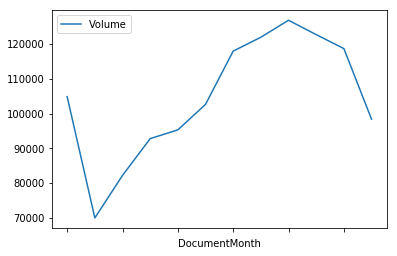

In [103]:
df_final_graph.plot()